In [19]:
# Multiple Regression
#Predicting Glucose Level using Multiple Regression



# Loading the package

import numpy as np
import matplotlib
import matplotlib.pyplot as plt


**Diabetes.DataExamples**


The diabetes dataset is included in the sklearn.datasets module and can be used to load as follows:

In [20]:
from sklearn import datasets,linear_model
# load the dataset
diabetes=datasets.load_diabetes()
X=diabetes.data
y=diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

***Knowing the size of the matrix***


The target values are stored in Y . The attributes of the diabetes are stored in data matrix X. The size is the number of samples (442) and the number of attributes is (10)

In [21]:
nsamp,natt=X.shape
print("num sample = {0:d} num attributes={1:d}".format(nsamp,natt) )

num sample = 442 num attributes=10


In [22]:
# Print normalized age of the first 5
print(X[0:5,0])

[ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306]


In [23]:
# Print the attributes S1 to S3 for subjects 10-15

print(X[9:15,4:7])

[[-1.25765827e-02 -3.45076144e-02 -2.49926566e-02]
 [-1.03389471e-01 -9.05611890e-02 -1.39477432e-02]
 [-7.07277125e-03  4.59715403e-02 -6.54906725e-02]
 [-4.32086554e-03 -9.76888589e-03  4.49584616e-02]
 [-4.32086554e-03 -1.57187067e-02 -2.90282981e-03]
 [ 1.76943802e-02 -6.12835791e-05  8.17748397e-02]]


Text(0, 0.5, 'Target')

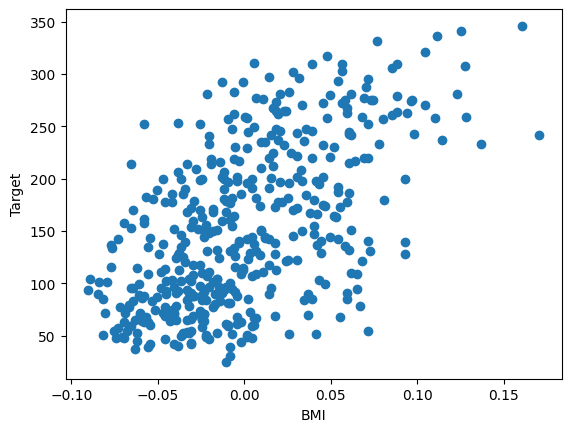

In [24]:
# Plot a scatter plot of the target variable y Vs the BMI . Does there seem to be a relation? What about y Vs age? Which is a better predictor?


plt.plot(X[:,2],y,'o')     # 2 is to represent the BMI
plt.xlabel('BMI')
plt.ylabel('Target')

**Multiple Linear Regression**


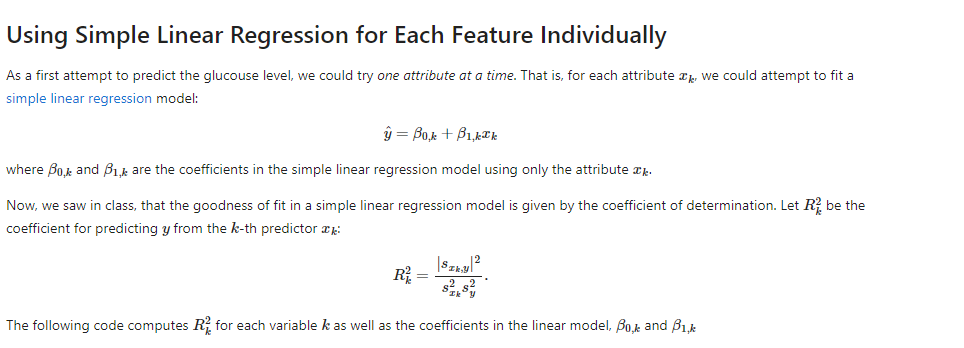

In [29]:
ym=np.mean(y)
syy=np.mean((y-ym)**2)
Rsq=np.zeros(natt)
beta0=np.zeros(natt)
beta1=np.zeros(natt)

for k in range (natt):
  xm=np.mean(X[:,k])
  sxy=np.mean((X[:,k]-xm)*(y-ym))
  sxx=np.mean((X[:,k]-xm)**2)
  beta1[k]=sxy/sxx
  beta0[k]=ym-beta1[k]*xm
  Rsq[k]=(sxy)**2/sxx/syy
  print("{0:2d} Rsq={1:f} beta0={2:f} beta1={3:f}".format(k,Rsq[k],beta0[k],beta1[k]))


 0 Rsq=0.035302 beta0=152.133484 beta1=304.183075
 1 Rsq=0.001854 beta0=152.133484 beta1=69.715356
 2 Rsq=0.343924 beta0=152.133484 beta1=949.435260
 3 Rsq=0.194906 beta0=152.133484 beta1=714.738259
 4 Rsq=0.044954 beta0=152.133484 beta1=343.254452
 5 Rsq=0.030295 beta0=152.133484 beta1=281.784593
 6 Rsq=0.155859 beta0=152.133484 beta1=-639.145279
 7 Rsq=0.185290 beta0=152.133484 beta1=696.883030
 8 Rsq=0.320223 beta0=152.133484 beta1=916.137375
 9 Rsq=0.146294 beta0=152.133484 beta1=619.222821


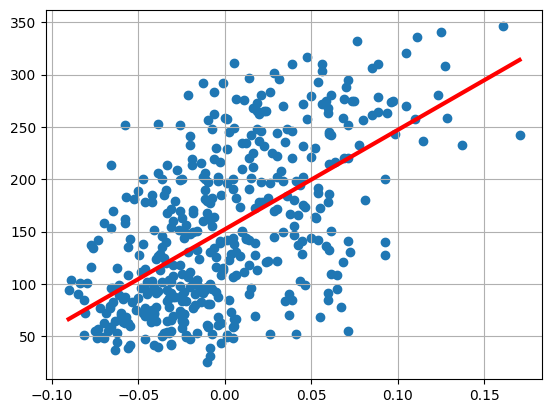

In [34]:
# Find the index of the single variable with the best R^2
imax=np.argmax(Rsq)

# Regression line over the range of x values
xmin=np.min(X[:,imax])
xmax=np.max(X[:,imax])
ymin=beta0[imax]+beta1[imax]*xmin
ymax=beta0[imax]+beta1[imax]*xmax
plt.plot([xmin,xmax],[ymin,ymax],'-r',linewidth=3)

#Scatter plot of the points
plt.scatter(X[:,imax],y)
plt.grid()

***Another approach- Removing the means***

In [37]:
# Remove the means- Another approach without the loops
ym=np.mean(y)
y1=y-ym # a column vector each minus mean
xm=np.mean(X,axis=0) # averaging over column, resulting a row vector of dimension Natt
X1=X-xm[None,:]# minus the same mean in each column

# Compute the correlation for features
syy=np.mean(y1**2)
sxx=np.mean(X1**2,axis=0) # a row vector with each element indicating the variance of one attribute
sxy=np.mean(X1*y1[:,None],axis=0) # a row vector with each element indicating the co variance on one attribute to the target

# Calculate the coefficients and R^2 value per feature
beta1=sxy/sxx # elementwise division , resulting a row vector containing beta1 for each attribute
beta0=ym-beta1*xm # elementwise multiplication , resulting a row vector containing beta0 for each attribute

Rsq=sxy**2/sxx/syy # a row vector containing Rsq for each attibute

for k in range(natt):
  print("{0:2d} Rsq={1:f} beta0={2:f} beta1={3:f}".format(k,Rsq[k],beta0[k],beta1[k]))


 0 Rsq=0.035302 beta0=152.133484 beta1=304.183075
 1 Rsq=0.001854 beta0=152.133484 beta1=69.715356
 2 Rsq=0.343924 beta0=152.133484 beta1=949.435260
 3 Rsq=0.194906 beta0=152.133484 beta1=714.738259
 4 Rsq=0.044954 beta0=152.133484 beta1=343.254452
 5 Rsq=0.030295 beta0=152.133484 beta1=281.784593
 6 Rsq=0.155859 beta0=152.133484 beta1=-639.145279
 7 Rsq=0.185290 beta0=152.133484 beta1=696.883030
 8 Rsq=0.320223 beta0=152.133484 beta1=916.137375
 9 Rsq=0.146294 beta0=152.133484 beta1=619.222821


**Improvements with a Multiple Variable Linear Model **

One possible way to try to improve the fit is to use multiple variables at the same time . We can fit the multiple linear model using the sklearn package


For reasons that we will explain in the next demo, we need to split the data into two parts: one part is to train the model and second part is for testing the fit. In this example we will use ns_test=300 samples for training and the remaining ns_test=442-300 = 142 for testing.

In [38]:
from types import new_class
ns_train=300
ns_test=nsamp-ns_train
X_tr=X[:ns_train,:]  # Gets the first ns_train rows of X
y_tr=y[:ns_train]

**To fit the linear model , we first create a regression object and then fit the data with regression object**

In [39]:
regr=linear_model.LinearRegression()
regr.fit(X_tr,y_tr)

LinearRegression()

In [44]:
# You can see the coefficients:

regr.intercept_

152.34779643323938

In [45]:
regr.coef_

array([ -16.57338609, -254.66343751,  560.9894609 ,  278.90965232,
       -393.45557666,   97.08855335,  -18.9842756 ,  169.46616165,
        632.96847103,  114.21833048])

In [46]:
# We next compute the RSS (per sample) and the R^2 on the training data


y_tr_pred=regr.predict(X_tr)
RSS_tr=np.mean((y_tr_pred-y_tr)**2)/(np.std(y_tr)**2)
Rsq_tr=1-RSS_tr
print("RSS per sample = {0:f}".format(RSS_tr))
print("R^2={0:f}".format(Rsq_tr))


RSS per sample = 0.485281
R^2=0.514719


***Scatter plot of predicted Vs Actual***

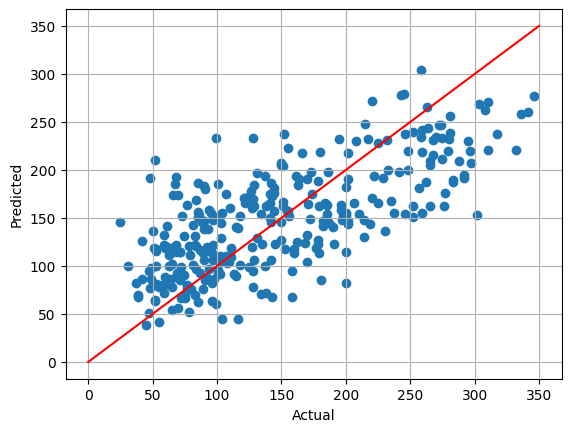

In [48]:
plt.scatter(y_tr,y_tr_pred)
plt.plot([0,350],[0,350],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

# ***Manually Computing the coefficients using "lstsq"***




Lstsq function calculates the optimal solution for a given set of data points, making it a valuable tool for data analysis and modeling.


In [53]:
ones = np.ones((ns_train,1))
A=np.hstack((ones,X_tr))
A.shape


(300, 11)

In [54]:
# Use lstsq method to solve y= A*beta . This will find the desired least square fit

out=np.linalg.lstsq(A,y_tr,rcond=None)
beta=out[0]
beta

array([ 152.34779643,  -16.57338609, -254.66343751,  560.9894609 ,
        278.90965232, -393.45557666,   97.08855335,  -18.9842756 ,
        169.46616165,  632.96847103,  114.21833048])

In [55]:
regr.coef_

array([ -16.57338609, -254.66343751,  560.9894609 ,  278.90965232,
       -393.45557666,   97.08855335,  -18.9842756 ,  169.46616165,
        632.96847103,  114.21833048])

In [56]:
regr.intercept_

152.34779643323938

In [57]:
beta=np.linalg.inv(A.T.dot(A)).dot(A.T.dot(y_tr))
print(beta)

[ 152.34779643  -16.57338609 -254.66343751  560.9894609   278.90965232
 -393.45557666   97.08855335  -18.9842756   169.46616165  632.96847103
  114.21833048]
